In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def create_environment(cities = ['A','B','C','D','E','F','G'],  path = ['A', 'F', 'D', 'E'], eps = 0.0001):
    N =len(cities)
    def distance_matrix(cities, path):
        data=np.random.randint([[len(path)]*N]*N, [[len(path)*10]*N]*N) # making random matrix with random integers between 5-100
        data1=data+data.T #taking the half matrix and changing the other half with the same numbers
        env = pd.DataFrame((data1) , columns=cities, index = cities)
        
        ## -1: disallowed passage
        for i in range(N):
            env.loc[cities[i], cities[i]] = -1

        for i in range(len(path)-1):
            env.loc[path[i], path[i+1]] = 1
            #env.loc[path[i+1], path[i]] = 1

        return env

    def pheremon_matrix(cities, eps = eps):
        N =len(cities)
        return pd.DataFrame(data=np.ones((N,N)) * eps, columns=cities, index = cities)
    return distance_matrix(cities, path), pheremon_matrix(cities)


In [3]:
class ant():
    def __init__(self, env, phe, 
                 start = 'A', end = 'E',
                alpha = 1, beta = 1, eva=0.5 ):
        
        self.env, self.phe  = env, phe
        self.alpha, self.beta = alpha, beta
        self.cities = list(self.env.columns)
        self.current_city = start
        self.target_city = end
        self.eva=eva
        
        self.route = [self.current_city]
        

    def decay(self,current_city):
        
        a=cities.index(current_city)
        b=cities[a]
        del(cities[a])
        for i in range(0,len(cities)-1):
            distances = 1/env.loc[cities[i] , env.loc[cities[i] ] > 0]   
            pheremons=phe.loc[cities[i] , env.loc[cities[i] ] > 0]=(1-self.eva)*phe.loc[cities[i] , env.loc[cities[i] ] > 0]
            
            
        cities.insert(a,b)    
        distances = 1/env.loc[current_city , env.loc[current_city ] > 0]   
        pheremons=phe.loc[self.current_city , env.loc[self.current_city ] > 0]=(1-self.eva)*phe.loc[self.current_city , env.loc[self.current_city ] > 0] +distances
        
        return pheremons
    def move(self):
        while((self.current_city)!=(self.target_city)):
            self.possible_cities = self.cities.copy()
            self.possible_cities.remove(self.current_city)
        
            distances = env.loc[self.current_city , env.loc[self.current_city ] > 0]
            pheremons=self.decay(self.current_city)
            preferences = pheremons**self.alpha/distances**self.beta
            probabilities = preferences/preferences.sum()
            #print(probabilities)
        
            self.current_city = np.random.choice(a = probabilities.index, 
                                                 size=1, 
                                                 p = probabilities.values)[0]

            self.route.append(self.current_city) 
            self.possible_cities.remove(self.current_city)
            #self.deposit()

    def deposit(self, delta = 1):
        i, j = self.route[-2:]
        self.phe.loc[i, j] +=  delta/self.env.loc[i, j]
        self.phe.loc[j, i] +=  delta/self.env.loc[j, i]
    def cost(self):
        result = 0
        for i in range(len(self.route)-1):
            result += self.env.loc[self.route[i], self.route[i+1]]
        return result

In [4]:
cities = ['A','B','C','D','E','F','G']
true_path = ['A', 'B','C','D', 'E']
env, phe = create_environment(cities = cities, path = true_path)

eps = 0.0001
K =len(cities)*2
time = 10
true_path_ratio = []

# in each time step
for t in range(time):
    # k ants exist in the colony
    colony = [ant(env = env, phe =phe) for k in range(K)]
    
    # each ant make N moves 
    for i in range(len(cities)):
        # distributed and paralel moves of K ants
        for c in colony:
            c.move()
            c.deposit()
        # after independent moves, ants deposit pheremon

           
            
    true_path_ratio.append(np.mean([a.route == true_path for a in colony]))

In [5]:
phe

,A,B,C,D,E,F,G
A,1.000000e-04,1.333333e-01,2.666667e-03,1.465201e-03,2.564103e-03,1.568627e-03,9.523810e-03
B,6.837607e-03,1.000000e-04,2.666667e-01,4.301075e-03,3.652968e-03,3.375527e-03,3.292181e-03
C,1.066667e-02,7.729469e-03,1.000000e-04,5.333333e-01,8.205128e-03,9.696970e-03,6.060606e-03
D,1.172161e-02,1.720430e-02,7.111111e-02,1.000000e-04,8.613333e+01,2.012579e-02,1.904762e-02
E,2.649735e-173,2.649735e-173,2.649735e-173,3.271795e+00,1.000000e-04,2.649735e-173,2.649735e-173
F,2.649735e-173,2.649735e-173,2.649735e-173,2.649735e-173,2.649735e-173,1.000000e-04,2.649735e-173
G,1.000000e-04,1.000000e-04,1.000000e-04,1.000000e-04,1.000000e-04,1.000000e-04,1.000000e-04


In [6]:
env

,A,B,C,D,E,F,G
A,-1,1,50,91,52,85,14
B,39,-1,1,62,73,79,81
C,50,69,-1,1,65,55,88
D,91,62,15,-1,1,53,56
E,52,73,65,26,-1,65,59
F,85,79,55,53,65,-1,42
G,14,81,88,56,59,42,-1


In [7]:
true_path_ratio

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [8]:
[(a.cost(), a.route) for a in colony]

[(4, ['A', 'B', 'C', 'D', 'E']),
 (4, ['A', 'B', 'C', 'D', 'E']),
 (4, ['A', 'B', 'C', 'D', 'E']),
 (4, ['A', 'B', 'C', 'D', 'E']),
 (4, ['A', 'B', 'C', 'D', 'E']),
 (4, ['A', 'B', 'C', 'D', 'E']),
 (4, ['A', 'B', 'C', 'D', 'E']),
 (4, ['A', 'B', 'C', 'D', 'E']),
 (4, ['A', 'B', 'C', 'D', 'E']),
 (4, ['A', 'B', 'C', 'D', 'E']),
 (4, ['A', 'B', 'C', 'D', 'E']),
 (4, ['A', 'B', 'C', 'D', 'E']),
 (4, ['A', 'B', 'C', 'D', 'E']),
 (4, ['A', 'B', 'C', 'D', 'E'])]

## Any Graph

In [9]:
N = 20
path_len = 10
cities = ['A'+str(i) for i in range(N)]
true_path = ['A'+str(i) for i in np.random.choice(N, size=path_len,replace=False)]

start, end = true_path[0], true_path[-1]

print(cities)
print(true_path)
print(start, end )

['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19']
['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']
A16 A11


In [10]:
env, phe = create_environment(cities = cities, path = true_path)

eps = 0.0001
K =len(cities)*2
time = 10
true_path_ratio = []

# in each time step
for t in range(time):
    # k ants exist in the colony
    colony = [ant(env = env, phe =phe, start = start, end = end) for k in range(K)]

    # each ant make N moves 
    for i in range(len(cities)):
        # distributed and paralel moves of K ants
        for k in range(K):
            colony[k].move()
            colony[k].deposit()
        # after independent moves, ants deposit pheremon
            

    true_path_ratio.append(np.mean([a.route == true_path for a in colony]))

In [11]:
true_path_ratio

[0.95, 1.0, 1.0, 0.9, 1.0, 0.95, 0.975, 1.0, 0.95, 1.0]

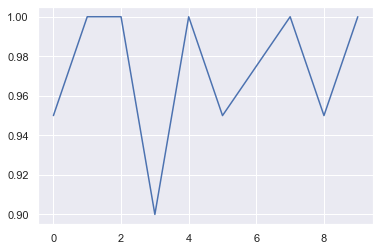

In [12]:
plt.plot(true_path_ratio)
plt.show()

In [13]:
#[(a.cost(), a.route) for a in colony]

In [14]:
true_path

['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']

In [15]:
phe

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19
A0,1.000000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
A1,0.000000e+00,1.000000e-04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
A2,0.000000e+00,0.000000e+00,1.000000e-04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
A3,1.113285e-02,3.131115e-02,1.391607e-02,1.000000e-04,0.010659,1.192806e-02,1.789209e-02,1.757819e-02,7.156835e-03,7.421903e-03,2.443797e-02,7.620039e+02,6.769979e-03,1.642552e-02,1.252446e-02,5.692937e-03,8.712669e-03,1.565558e-02,5.928739e-03,7.313554e-03
A4,4.850953e-156,3.729170e-156,5.737185e-156,6.347524e-156,0.000100,4.058961e-156,1.217688e-155,6.347524e-156,4.452741e-156,6.088441e-156,4.031536e-156,4.554712e-156,4.419757e-156,6.780310e-156,1.387598e-155,4.890715e-156,3.409527e-156,5.682545e-156,3.899786e-156,7.955563e-156
A5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
A6,1.683395e-04,1.373296e-04,2.846469e-04,2.795639e-04,0.000320,1.338084e-04,1.000000e-04,1.647956e-04,4.473022e-04,1.110325e-04,1.909217e-04,2.236511e-04,1.565558e-02,1.293849e-04,1.476941e-04,1.036793e-04,1.168327e-04,3.010688e-04,2.144600e-04,1.779043e-04
A7,3.913894e-03,1.941777e-03,2.752629e-03,4.394548e-03,0.002665,2.504892e-03,2.636729e-03,1.000000e-04,2.341021e-03,2.504892e-01,2.140934e-03,1.482185e-03,3.578418e-03,2.070159e-03,2.480091e-03,1.353996e-03,2.408550e-03,2.480091e-03,2.020074e-03,3.528017e-03
A8,1.192806e-03,1.332390e-03,7.977364e-04,8.946044e-04,0.000935,1.304631e-03,3.578418e-03,1.252446e-01,1.000000e-04,1.149033e-03,1.491007e-03,9.277379e-04,1.089084e-03,2.783214e-03,7.455037e-04,8.758365e-04,8.132767e-04,6.390032e-04,9.560658e-04,1.052476e-03
A9,3.455024e-03,9.452424e-03,7.367330e-03,5.009785e-01,0.005112,6.769979e-03,3.553039e-03,3.503346e-03,4.596133e-03,1.000000e-04,3.553039e-03,3.431359e-03,8.789096e-03,4.318780e-03,4.513320e-03,5.164727e-03,9.108700e-03,5.758373e-03,5.386865e-03,4.040149e-03


In [16]:
env

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19
A0,-1,130,127,90,123,42,93,64,105,145,117,102,83,71,78,115,121,133,40,127
A1,130,-1,170,32,160,139,114,129,94,53,168,183,131,152,107,85,114,150,104,157
A2,127,170,-1,72,104,135,55,91,157,68,140,78,120,178,123,173,119,136,86,123
A3,90,32,72,-1,94,84,56,57,140,135,41,1,148,61,80,176,115,64,169,137
A4,123,160,104,94,-1,147,49,94,134,98,148,131,135,88,43,122,175,105,153,75
A5,42,139,135,84,147,-1,117,100,96,74,106,96,156,108,142,77,67,66,147,74
A6,93,114,55,56,49,117,-1,95,35,141,82,70,1,121,106,151,134,52,73,88
A7,64,129,91,57,94,100,95,-1,107,1,117,169,70,121,101,185,104,101,124,71
A8,105,94,157,140,134,96,35,1,-1,109,84,135,115,45,168,143,154,196,131,119
A9,145,53,68,1,98,74,141,143,109,-1,141,146,57,116,111,97,55,87,93,124


In [17]:
[(a.cost(), a.route) for a in colony]

[(9, ['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']),
 (9, ['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']),
 (9, ['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']),
 (9, ['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']),
 (9, ['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']),
 (9, ['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']),
 (9, ['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']),
 (9, ['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']),
 (9, ['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']),
 (9, ['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']),
 (9, ['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']),
 (9, ['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']),
 (9, ['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7', 'A9', 'A3', 'A11']),
 (9, ['A16', 'A17', 'A6', 'A12', 'A14', 'A8', 'A7',